In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# 1. Basic Operations

**Q1.** Write code to create a DataFrame from a dictionary containing student names and their scores in three subjects (Math, Science, English).<br/>
* Write a code to add a new column `Total Marks`, which calculates the total marks for each student.
* Print first five rows of the DataFrame and summary statistics using the `describe()` method.


```python
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}
```

In [2]:
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}

marks = pd.DataFrame(data)

marks.describe()

,Math,Science,English
count,5.000000,5.000000,5.000000
mean,84.000000,86.000000,84.600000
std,9.617692,6.670832,4.774935
min,70.000000,75.000000,78.000000
25%,80.000000,85.000000,82.000000
50%,85.000000,88.000000,85.000000
75%,90.000000,90.000000,88.000000
max,95.000000,92.000000,90.000000


In [3]:
marks.eval('Total = Math + Science + English', inplace = True)
marks

,Name,Math,Science,English,Total
0,Virat,90,85,78,253
1,Dhoni,80,88,85,253
2,Rohit,85,90,82,257
3,Sachin,70,75,90,235
4,Gavaskar,95,92,88,275


In [4]:
marks["Total"] = marks["Math"] + marks["Science"] + marks["English"]
marks

,Name,Math,Science,English,Total
0,Virat,90,85,78,253
1,Dhoni,80,88,85,253
2,Rohit,85,90,82,257
3,Sachin,70,75,90,235
4,Gavaskar,95,92,88,275


**Q2.** Create a dummy CSV file named students.csv containing the following columns: Name, Age, Gender, and Marks (atleast 5 entries). Perform the following tasks:

- Load the file into a DataFrame using Pandas.
- Display the last 3 rows of the DataFrame.
- Print the total number of rows and columns in the DataFrame.

In [5]:
df = pd.read_csv("students.csv")
df[-3:]

,Name,Age,Gender,Marks
2,Nayana,18,Female,85
3,Rudra,18,Don't Know,17
4,Naman,17,Male,40


In [6]:
print("Total number of rows:", len(df))
print("Total number of columns:", len(df.columns))

Total number of rows: 5
Total number of columns: 4


**Q3.** Create and populate a DataFrame with columns Employee_ID, Name, Department, and Salary. Now perform the following:

- Add a new column Bonus where each employee gets 10% of their Salary.
- Increase the Salary of all employees in the IT department by 20%.
- Drop the Department column from the DataFrame.


In [7]:
df = pd.read_csv("employees.csv")
salaryArray = df['Salary'].to_numpy()
#calculating 10%
bonusArray = salaryArray*0.1
#adding bonus column
df['Bonus'] = bonusArray
df

,Employee_ID,Name,Department,Salary,Bonus
0,123456,Amartya,Marketing,20000,2000.0
1,784768,Haqim,HR,30000,3000.0
2,675030,Jeffrey,Development,59000,5900.0
3,489434,Walter,Manufacturing,90000,9000.0
4,684387,Pablo,HR,100000,10000.0
5,563748,Grestin,IT,76000,7600.0


In [8]:
# Increase the Salary of all employees in the IT department by 20%
df.loc[df['Department'] == 'IT', 'Salary'] *= 1.2
df

,Employee_ID,Name,Department,Salary,Bonus
0,123456,Amartya,Marketing,20000,2000.0
1,784768,Haqim,HR,30000,3000.0
2,675030,Jeffrey,Development,59000,5900.0
3,489434,Walter,Manufacturing,90000,9000.0
4,684387,Pablo,HR,100000,10000.0
5,563748,Grestin,IT,91200,7600.0


In [9]:
df = df.drop(columns=["Department"])
df

,Employee_ID,Name,Salary,Bonus
0,123456,Amartya,20000,2000.0
1,784768,Haqim,30000,3000.0
2,675030,Jeffrey,59000,5900.0
3,489434,Walter,90000,9000.0
4,684387,Pablo,100000,10000.0
5,563748,Grestin,91200,7600.0


# 2. Indexing and Slicing

**Q1.** You are given a data about employees' performance:

```
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}
```
Using boolean indexing, select employees who meet all of the following conditions:

- Belong to either 'HR' or 'IT' departments.
- Have a performance rating greater than or equal to 8.0.
- Earn a salary less than 55,000 or have been with the company for at least 4 years.


In [10]:
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}

df = pd.DataFrame(data)
mask = ((df["Department"] == 'HR') | (df["Department"] == "IT")) & (df['Performance_Rating']>=8.0) & ((df['Years_at_Company'] >=4) | (df['Salary']<55000))
df[mask]

,Employee,Department,Salary,Performance_Rating,Years_at_Company
0,E1,HR,50000,8.2,5
4,E5,HR,52000,8.0,4


**Q2.** Slicing Rows and Columns

```
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
```

Use slicing to select the following:

- The last 3 rows of the DataFrame.
- All columns except 'Stock' and 'Rating' from the first 3 rows.

In [11]:
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
df = pd.DataFrame(data)
print(df[-3:])

      Product  Price  Stock  Rating
2      Tablet    300     50     3.8
3     Monitor    150     10     4.8
4  Headphones     50    100     4.0


**Q3.** Label-based Indexing with `.loc[]` and `.iloc[]`

```
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}
```

Using .loc[] and .iloc[], perform the following tasks:

- Select the row corresponding to 'Tom' using label-based indexing.
- Select the first two rows and the 'Salary' and 'Department' columns using position-based indexing.

In [12]:
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}

df = pd.DataFrame(data)
df

,Name,Age,Salary,Department
0,John,29,50000,HR
1,Sara,35,60000,Finance
2,Tom,40,75000,IT
3,Alex,25,45000,HR
4,Julia,31,52000,IT


In [13]:
# Selecting the row corresponding to Tom
row = df.loc[df['Name'] == 'Tom']
row

,Name,Age,Salary,Department
2,Tom,40,75000,IT


In [14]:
subdf = df.iloc[:2, [2,3]]
subdf

,Salary,Department
0,50000,HR
1,60000,Finance


# 3. GroupBy and Aggregations


**Q1.** You have a dataset of students' test scores. The dataset has the following columns:

* StudentID: Unique ID of the student.
* Subject: The subject of the test.
* Score: The score obtained (out of 100).
```
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
```

* Write a function to calculate the average score for each student. Use this function to group the data by StudentID and find the average score.

In [15]:
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
df = pd.DataFrame(data)
result = df.groupby("StudentID")
result.Score.mean()

StudentID
1    90.0
2    89.0
3    85.0
Name: Score, dtype: float64



**Q2.** Create  a dataset of retail sales with a hierarchical index consisting of `Region` and `StoreID`. The dataset contains the following columns:

* ProductCategory: The category of the product sold (e.g., Electronics, Clothing)

* Sales: The amount of sales made

Group the data by respective level indices  and calculate:

* Total sales in each region.
* Average sales in each store .


In [16]:
data = {
    'Region': ['North', 'North', 'North', 'South', 'South', 'East', 'East', 'East', 'West', 'West'],
    'StoreID': [1, 1, 2, 3, 3, 4, 4, 5, 6, 6],
    'ProductCategory': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics',
                        'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Sales': [5000, 7000, 8000, 6000, 4500, 7200, 3100, 5600, 4000, 3000]
}

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Set the hierarchical index
df.set_index(['Region', 'StoreID'], inplace = True)

# Display the DataFrame
df

ProductCategory  Sales
Region StoreID                       
North  1           Electronics   5000
       1              Clothing   7000
       2           Electronics   8000
South  3              Clothing   6000
       3           Electronics   4500
East   4              Clothing   7200
       4           Electronics   3100
       5              Clothing   5600
West   6           Electronics   4000
       6              Clothing   3000

In [17]:
# Grouping by region
sumSet = df.groupby(level = "Region")

# Calculating the sum and displaying
sumSet['Sales'].sum()


Region
East     15900
North    20000
South    10500
West      7000
Name: Sales, dtype: int64

In [18]:
#Grouping by store ID
avgSet = df.groupby('StoreID')

#Calculating the mean and displaying
avgSet['Sales'].mean()

StoreID
1    6000.0
2    8000.0
3    5250.0
4    5150.0
5    5600.0
6    3500.0
Name: Sales, dtype: float64

**Q3.** You are given a DataFrame `df_orders` as follows:

```
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})
```
- Group the data by "`Category`" and compute:
  - Total revenue `(Price * Quantity)`.
  - Total discounts given` (Discount * Quantity)`.

- For each category find the followng:
  * The order with the highest revenue.
  * The average discount per order.




In [19]:
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})

#Defining Revenue and Discount
df_orders['revenue'] = df_orders['Price'] * df_orders['Quantity']
df_orders['totalDiscount'] = df_orders['Discount'] * df_orders['Quantity']

grouped = df_orders.groupby('Category').agg(
    Total_Revenue=('revenue', 'sum'),
    Total_Discounts=('totalDiscount', 'sum')
)

grouped

,Total_Revenue,Total_Discounts
Category,,
Clothing,500,50
Electronics,2000,100
Groceries,500,50


In [20]:
#order with the highest revenue
highestRevenueOrders = df_orders.loc[df_orders.groupby('Category')['revenue'].idxmax(), ['Category', 'Order_ID', 'revenue']]
print("\nOrder with the Highest Revenue in Each Category:\n", highestRevenueOrders)


Order with the Highest Revenue in Each Category:
       Category Order_ID  revenue
2     Clothing       O3      300
0  Electronics       O1     1000
5    Groceries       O6      300


In [21]:
#Calculating Average discount per order
avgDiscountperOrder = df_orders.groupby('Category').agg(
    avgDiscountperOrder=('Discount', 'mean')
)

avgDiscountperOrder

,avgDiscountperOrder
Category,
Clothing,15.0
Electronics,37.5
Groceries,5.5


# 4. Handling Missing Data

You are provided with a dataset, `numeric_df`, containing numeric features from the Titanic dataset. Your task is to explore and handle the missing data systematically.



**Q1.** **Load and Inspect the Data**
- Run the cell below to get the dataset `numeric_df`.
- Display the first 5 rows of the dataset.
- Create a **heatmap** to visualize where the missing values occur.
- Count the missing values in each column and report them (also, plot them).
- Drop the column with more than 60 percent `NaN` values. Why?


In [22]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Introducing missing values in the 'pclass' column
np.random.seed(42)
pclass_nan_indices = np.random.choice(numeric_df.index, size=int(0.05 * len(numeric_df)), replace=False)
numeric_df.loc[pclass_nan_indices, 'pclass'] = np.nan

# Introducing missing values in the 'parch' column
parch_nan_indices = np.random.choice(numeric_df.index, size=int(0.70 * len(numeric_df)), replace=False)
numeric_df.loc[parch_nan_indices, 'parch'] = np.nan

In [23]:
# displaying first 5 rows
numeric_df[:5]

,survived,pclass,age,sibsp,parch,fare
0,0,3.0,22.0,1,0.0,7.2500
1,1,1.0,38.0,1,NaN,71.2833
2,1,3.0,26.0,0,NaN,7.9250
3,1,1.0,35.0,1,0.0,53.1000
4,0,3.0,35.0,0,0.0,8.0500




**Q2** **Handle Missing Values**
- For the `pclass` column, use **mode imputation** to fill the missing values.
- Explain why mode imputation is appropriate for this column.

- How would you impute the values for the column `age`. Why?



**Q3** **Analyze Results**
- Compare the dataset before and after imputation:
  - Count the missing values after imputation.
  - Calculate the **mean** of all numeric columns before and after imputation.

# 5. Pandas: Merging Joining and Concatenation

**Q1.** You have two DataFrames `df1` and `df2` where `df1` has a column `student_id` and `df2` has a column `student_id` along with `grade`, how would you merge these DataFrames on `student_id` to keep only the rows present in both DataFrames? Show output of the merge.

```python
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
```

In [24]:
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

newDf = pd.merge(df1,df2, on = "student_id") #merging the dataframes
newDf

,student_id,name,grade
0,2,Bob,A
1,3,Charlie,B
2,4,David,C


**Q2.** If you are provided with two DataFrames, employees and departments with `employee_id` as the index, how would you join them such that all rows from the employees DataFrame are kept, even if there is no matching department record? (you may assume employees have 2nd column as `employee_name` and departments have 2nd column as `department_name`, and randomly assign its data)

```python
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)
```

In [25]:
employees_data =pd.DataFrame( {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
})
departments_data = pd.DataFrame( {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
})
merged_data = pd.merge(employees_data,departments_data,how='left',on='employee_id') #Uses the in-built merge function and uses the column "employee_id" to index the entries
merged_data

,employee_id,employee_name,department_name
0,1,Alice,D
1,2,Bob,A
2,3,Charlie,B
3,4,David,C


**Q3**. Given two DataFrames `df_a` and `df_b` with the same columns, how would you concatenate them vertically, resetting the index so it starts from zero in the combined DataFrame? (you may assume both dataframes have 2 columns each, and randomly assign its data)

```python
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)
```

In [26]:
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)

concatenatedData = pd.concat([df_a,df_b])
concatenatedData

,student_id,name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
0,5,Anish
1,6,Divakar
2,7,Vaibhav
3,8,Tanvi


# 6. Pandas: Advanced Operations (Evaluation and Query)

You are provided with the dataset, `iris`, which contains information about iris flower species and their physical measurements. Your task is to use :


**Q1** **Pandas advanced operations** such as evaluation (`eval`) and conditional querying (`query`) to analyze and extract insights from the dataset.

In [27]:
iris = sns.load_dataset('iris')
iris.query

<bound method DataFrame.query of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

**Q2** **Load and Inspect the Data**
- Run `iris = sns.load_dataset('iris')` to load the dataset.
- Display the first 5 rows of the dataset.
- Print the summary statistics of the dataset.

In [28]:
iris = sns.load_dataset('iris')
# display first 5 rows
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# printing summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Q3** **Filter the Data Using `query`**
- Use the `query` method to:
  1. Find all flowers with a `sepal_length`> 6.5 and a `petal_length` > 5.
  2. Find all `virginica` flowers with a `petal_width` less than 2.




In [30]:
# Find all flowers with sepal_length>6.5 petal_length>5
iris.query("sepal_length > 6.5 and petal_length>5")

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
112,6.8,3.0,5.5,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
120,6.9,3.2,5.7,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica


In [31]:
# Find all `virginica` flowers with a `petal_width` less than 2.
iris.query('species == "virginica" and petal_width<2')

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
103,6.3,2.9,5.6,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
116,6.5,3.0,5.5,1.8,virginica
119,6.0,2.2,5.0,1.5,virginica
123,6.3,2.7,4.9,1.8,virginica
125,7.2,3.2,6.0,1.8,virginica



**Q4** **Use `eval` for Calculations**
- Create a new column `petal_area` using the formula:  
  `petal_area = petal_length * petal_width`
- Display the top 5 flowers with the largest `petal_area`.
- Use `query` to filter flowers that meet the following conditions:
  - `petal_area` > 10
  - `sepal_length` is in the range 5 to 7.


In [32]:
#creating a column called petal_area = petal_length * petal_width
iris.eval("petal_area = petal_length * petal_width", inplace = True)
# getting the top 5 largest petal area flowers
largestArea = iris.nlargest(5, 'petal_area')
largestArea

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
118,7.7,2.6,6.9,2.3,virginica,15.87
109,7.2,3.6,6.1,2.5,virginica,15.25
100,6.3,3.3,6.0,2.5,virginica,15.00
117,7.7,3.8,6.7,2.2,virginica,14.74
144,6.7,3.3,5.7,2.5,virginica,14.25


In [33]:
# flowers that have petal_area > 10 and 5 < sepal_length < 7
iris.query('petal_area>10 and 5 < sepal_length < 7')

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
100,6.3,3.3,6.0,2.5,virginica,15.00
103,6.3,2.9,5.6,1.8,virginica,10.08
104,6.5,3.0,5.8,2.2,virginica,12.76
108,6.7,2.5,5.8,1.8,virginica,10.44
110,6.5,3.2,5.1,2.0,virginica,10.20
111,6.4,2.7,5.3,1.9,virginica,10.07
112,6.8,3.0,5.5,2.1,virginica,11.55
114,5.8,2.8,5.1,2.4,virginica,12.24
115,6.4,3.2,5.3,2.3,virginica,12.19
120,6.9,3.2,5.7,2.3,virginica,13.11



**Q5** **Analyze and Visualize**
- Perform a group-wise analysis:
  1. Calculate the **average petal length** for each species.
  2. Find the **count of flowers** for each species.
  3. Create a scatter plot of `sepal_length` vs. `petal_length`, colored by species.


In [34]:
#grouping by the species of flower
speciesSet = iris.groupby("species")

# mean of each flower species' petal length
speciesSet['petal_length'].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

In [35]:
# finding the count of each species of flower
speciesSet['species'].count()

species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

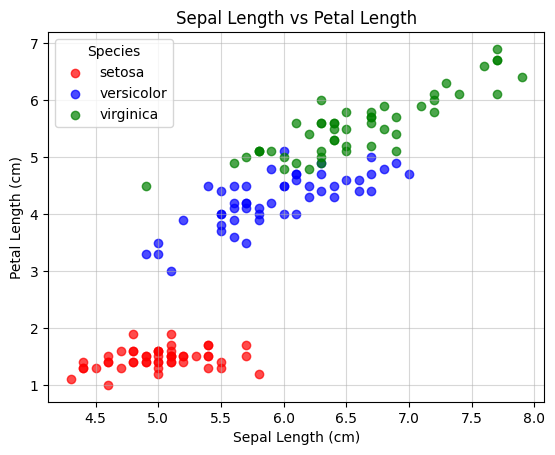

In [36]:
species_colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

for species, color in species_colors.items():
    subset = iris[iris['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], label=species, color=color, alpha=0.7)

plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

# 7. Matplotlib: Basic Plotting Questions

**Q1. Line Plot**

Plot a sine wave (\(y = sin(x)\)) for \(x in [0, 2π]\). Customize the plot by:
1. Adding a title to the graph.
2. Adding labels for the x-axis and y-axis.
3. Displaying a grid.

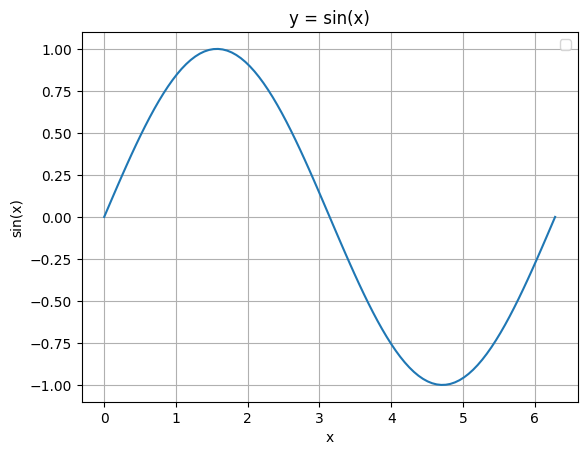

In [37]:
angles = np.linspace(0, 2 * np.pi, 100)
sines = np.sin(angles)
plt.plot(angles,sines)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("y = sin(x)")
plt.legend()
plt.grid()
plt.show()

**Q2. Multiple Line Plots**

Plot the following functions on the same graph for \(x \in [0, 2π]\):
1. \(y_1 = sin(x)\)
2. \(y_2 = cos(x)\)
Customize the graph by:
- Using different colors and line styles for each function.
- Adding a legend to identify the curves.



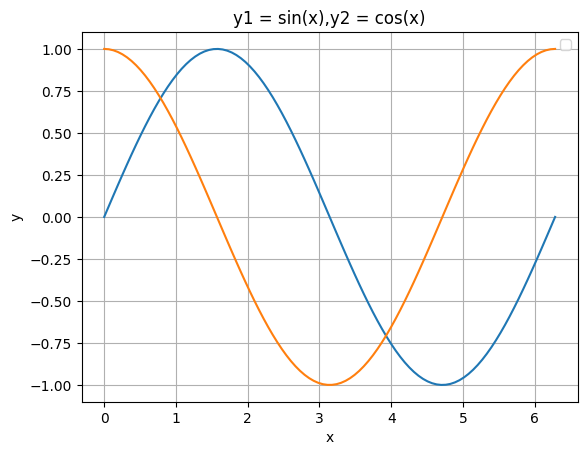

In [39]:
angles = np.linspace(0, 2 * np.pi, 100)
sines = np.sin(angles)
cosines = np.cos(angles)
plt.plot(angles,sines)
plt.plot(angles,cosines)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y1 = sin(x),y2 = cos(x)")
plt.legend()
plt.grid()
plt.show()



**Q3. Plot Customization**

Plot the function \(y = x^2\) for \(x \in [-10, 10]\). Customize the plot by:
1. Adding a title and axis labels.
2. Changing the line style, color, and thickness.
3. Adjusting the axis limits to make the graph more visually appealing.


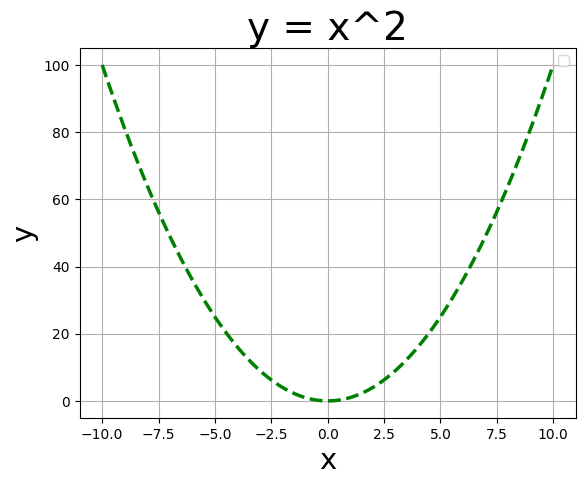

In [40]:
x = np.linspace(-10, 10, 1000)
y = np.square(x)
plt.plot(x,y,color='green',linestyle='dashed',linewidth = '2.5')
plt.xlabel("x",fontsize = 21)
plt.ylabel("y", fontsize = 21)
plt.title("y = x^2",fontsize = 28)
plt.legend()
plt.grid()
plt.show()

# 8a. Bar Plot

**Q1** You are provided with the `tips` dataset. Your task is to create a **bar plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
```
- Create a bar plot showing the average tip for each day of the week.
Label the x-axis as Day, the y-axis as Average Tip, and add a title: "Average Tip by Day".

- Based on the bar plot, which day has the highest average tip?


In [14]:
tips = sns.load_dataset('tips')
day_grouped = tips.groupby('day')['tip'].mean() # grouping tip by day and displaying mean for each day

Text(0.5, 0, 'Day')

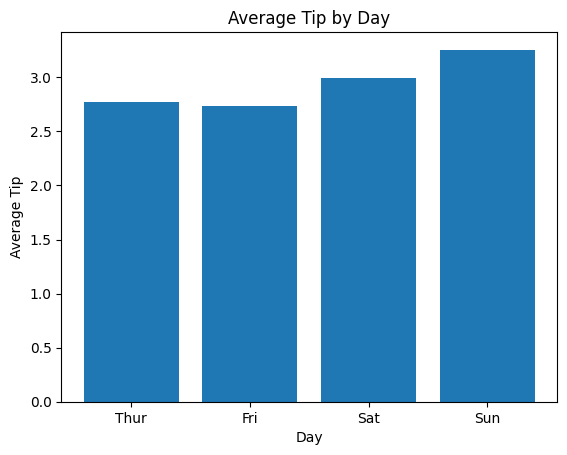

In [19]:
plt.bar(day_grouped.index.tolist(), day_grouped.values.tolist())
plt.title("Average Tip by Day")
plt.ylabel('Average Tip')
plt.xlabel('Day')

Based on the bar-plot above the **Sunday** has the highest average tip

# 8b. Scatter Plot

**Q1.** You are provided with the `tips` dataset. Your task is to create a **scatter plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
  ```

- Create a scatter plot with total_bill on the x-axis and tip on the y-axis.
- Label the x-axis as Total Bill, the y-axis as Tip, and add a title: "Relationship between Total Bill and Tip".

- Based on the scatter plot, do you observe any relationship between total_bill and tip?


Text(0.5, 1.0, 'Relationship between Total Bill and TIp')

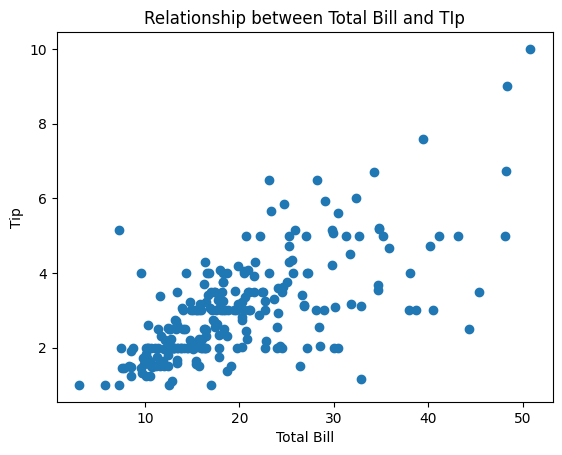

In [22]:
plt.scatter(tips['total_bill'],tips['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relationship between Total Bill and TIp')

# 9. Matplotlib: Subplots and Layouts

There appears to be a positive relationship between `total_bill` and `tip`. As the total bill increases, the tip generally tends to increase as well. However, the relationship **does not appear to be perfectly linear**, and there is some **variability** in the amount of tip given for a given total bill

**Q1.** Create a 2x2 grid of subplots with:
- Subplot (1,1): Plot y = sin(x).
- Subplot (1,2): Plot y = cos(x) .
- Subplot (2,1): Plot y = e<sup>−x</sup>
- Subplot (2,2): Plot y=ln(x) for x∈[0.1,2].

Customize background colors, add unique x and y labels, and set titles.


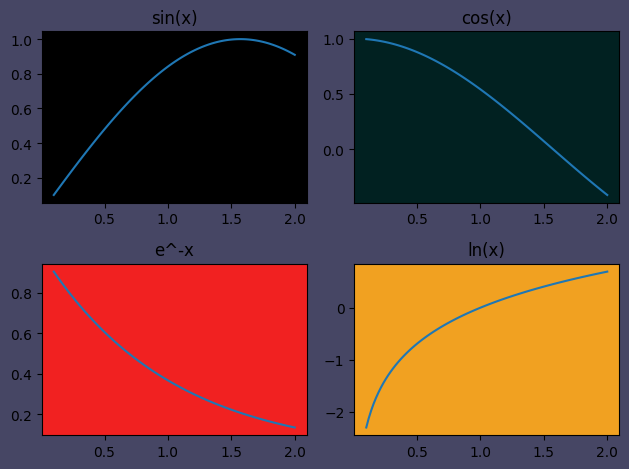

In [49]:
x = np.linspace(0.1,2,100) # create 100 points between 0.1 and 2
fig, ax = plt.subplots(2,2)

fig.patch.set_facecolor('#464664')  # Light grey color

#sin wave at (1, 1)
ax[0,0].plot(x, np.sin(x))
ax[0,0].set_title('sin(x)')
ax[0,0].set_facecolor('#000000')

#cos wave (1, 2)
ax[0,1].plot(x, np.cos(x))
ax[0,1].set_title('cos(x)')
ax[0,1].set_facecolor('#012121')

#e^(-x) at (2, 1)
ax[1,0].plot(x, np.exp(-x))
ax[1,0].set_title('e^-x')
ax[1,0].set_facecolor('#f12121')

#lnx at (2,2)
ax[1,1].plot(x, np.log(x))
ax[1,1].set_title('ln(x)')
ax[1,1].set_facecolor('#f1a121')

plt.tight_layout()


**Q2.** Create a subplot within another subplot:
- Main subplot: Display a scatter plot of 100 random points with x and y values between 0 and 1.
- Inset subplot: Display a histogram of the x-values from the scatter plot.


Text(0.5, 1.0, 'X-Values Histogram')

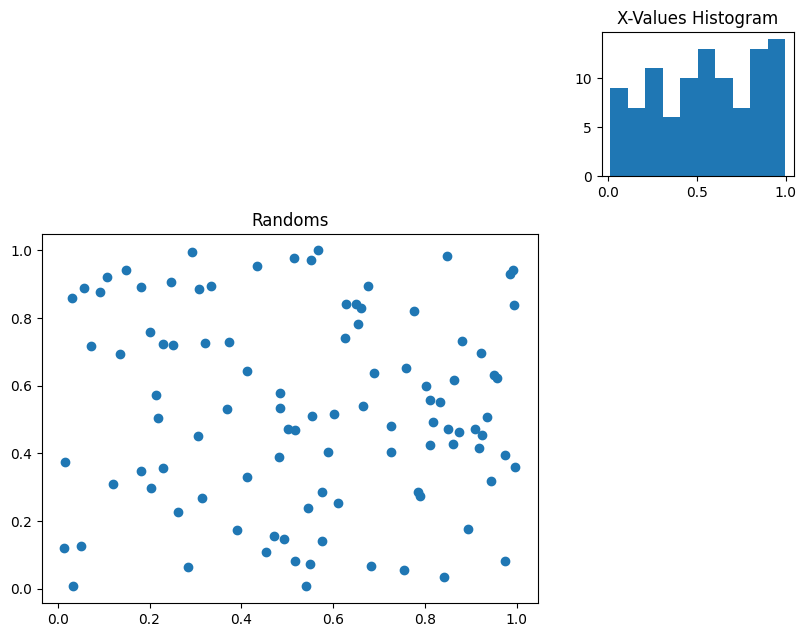

In [63]:
# generating 100 random values
random_x = np.random.random(100)
random_y = np.random.random(100)

plt.scatter(random_x, random_y)
plt.title('Randoms')

subplot = plt.axes([1,1,0.3,0.3])
subplot.hist(random_x)
subplot.set_title("X-Values Histogram")



**Q3.** Create a Layout with One Large and Two Smaller Subplots

- Design a large subplot occupying the top two-thirds of the figure and plot \( y = sin(x) \) and \( y = cos(x) \) on the same graph.  

- Create two smaller subplots in the bottom row:  
   - On the left, plot y =x<sup>2</sup>.  
   - On the right, plot y = e<sup>x</sup>.  

Ensure each subplot has appropriate titles, axis labels, and legends where necessary. Use a clean layout that avoids overlapping elements.


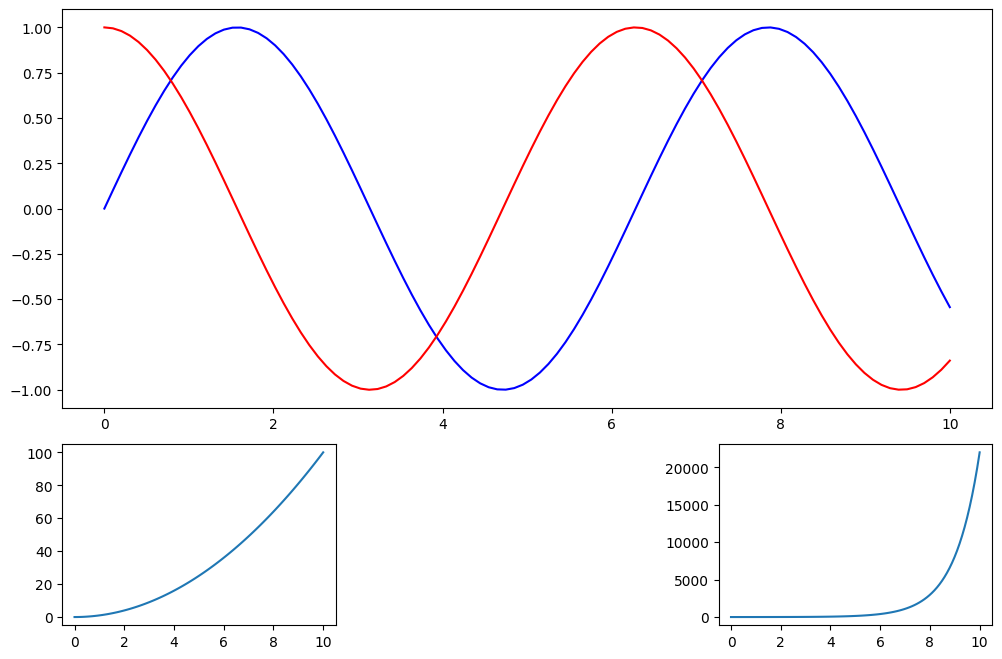

In [13]:
x = np.linspace(0,10,100) # divide 0-10 in 100 parts
fig = plt.figure(figsize=(12,8))

#dual graph sin(x) and cos(x)
ax1 = plt.subplot2grid((3,3), (0, 0), colspan=3, rowspan=2)
ax1.plot(x, np.sin(x),color='blue')
ax1.plot(x, np.cos(x), color='red')

#x^2 graph
ax2 = plt.subplot2grid((3,3),(2,0),colspan=1)
ax2.plot(x, x ** 2)

#exponential graph
ax2 = plt.subplot2grid((3,3),(2,2),colspan=1)
ax2.plot(x, np.exp(x))

# ax2 = plt.subplot2

# 10. Matplotlib: Advanced Customization

**Q1. Customizing Axes and Ticks**

Create a line plot for y = x^2 in the range -10 to 10.
Customize the axes and ticks:
1. Set x-axis range to -10 to 10.
2. Set y-axis range to 0 to 100.
3. Use custom tick marks at intervals of 2 for x-axis and 10 for y-axis.
4. Rotate x-axis tick labels by 45 degrees.

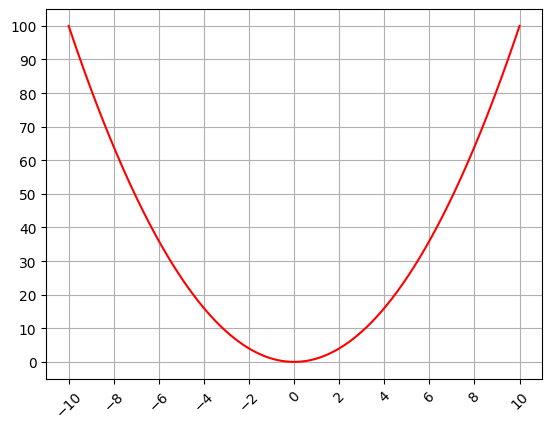

In [32]:
x = np.linspace(-10,10,1000)

#x squared
y = np.square(x)

plt.plot(x, y, color='red')
plt.grid()

#setting up custom ticks at intervals of 2 for x axis and 10 for y axis
plt.xticks(np.arange(-10,11,2), rotation=45)
plt.yticks(np.arange(0,110,10))

plt.show()


**Q2. Multiple Subplots with Shared Legend and Grid Customization**

Create a figure with four subplots (2x2 grid) showing different trigonometric functions:
1. Top-left: y = sin(x)
2. Top-right: y = cos(x)
3. Bottom-left: y = tan(x) (restrict x to avoid undefined regions).
4. Bottom-right: y = sin^2(x) + cos^2(x) (should always equal 1).

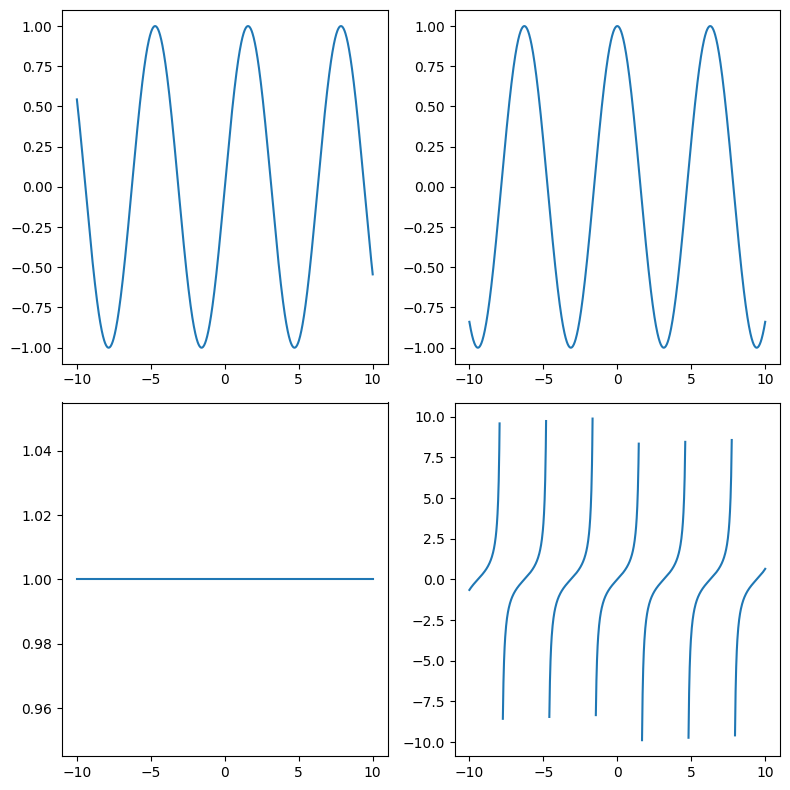

In [39]:
figure = plt.figure(figsize=(8,8))

# top left graph sin(x)
ax1 = plt.subplot2grid((2,2), (0,0), colspan=1, rowspan=1)
ax1.plot(x, np.sin(x))

# top right graph cos(x)
ax2 = plt.subplot2grid((2,2), (0,1), colspan=1, rowspan=1)
ax2.plot(x, np.cos(x))


# bottom left graph sin^2(x) + cos^2(x)
ax2 = plt.subplot2grid((2,2), (1,0), colspan=1, rowspan=1)
ax2.plot(x, np.square(np.sin(x)) + np.square(np.cos(x)))

# bottom right graph tan(x)
ax2 = plt.subplot2grid((2,2), (1,1), colspan=1, rowspan=1)
tanx = np.tan(x)
tanx[np.abs(tanx) > 10] = np.nan
ax2.plot(x, tanx)

plt.tight_layout()


**Q3. Subplots and Shared Axes**

Create two subplots side-by-side:
1. Bar chart for sales (random data) from January to June.
2. Line chart for cumulative sales.
Share the y-axis and add titles, a common x-axis label, and a grid for the second plot.

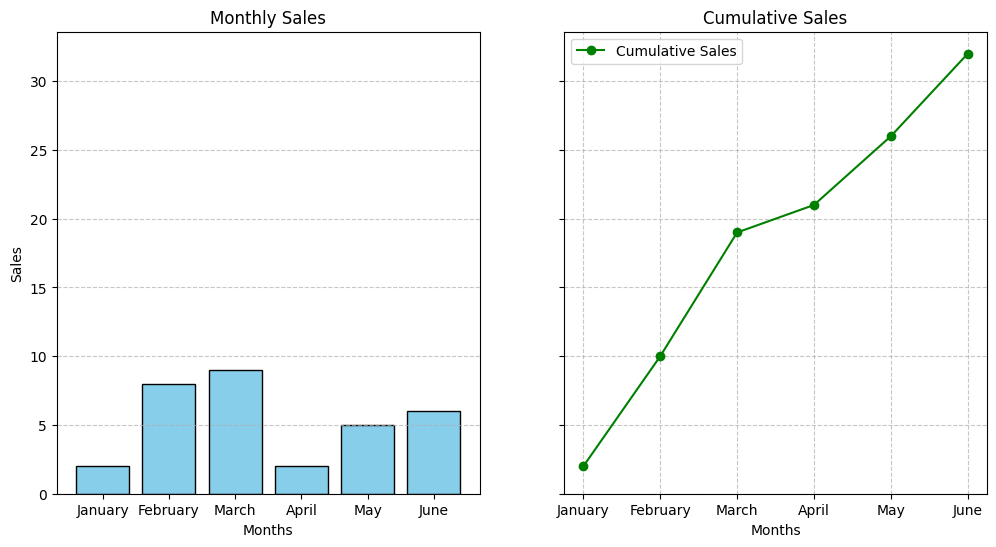

In [4]:
months = ['January', 'February', 'March', 'April', 'May', 'June']
sales = np.random.randint(1,10,6)
cumulative_sales = np.cumsum(sales)
# plt.bar(months, sales)

# Create the subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar chart for monthly sales
ax1.bar(months, sales, color='skyblue', edgecolor='black')
ax1.set_title("Monthly Sales")
ax1.set_ylabel("Sales")
ax1.set_xlabel("Months")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Line chart for cumulative sales
ax2.plot(months, cumulative_sales, marker='o', color='green', label='Cumulative Sales')
ax2.set_title("Cumulative Sales")
ax2.set_xlabel("Months")
ax2.grid(axis='both', linestyle='--', alpha=0.7)
ax2.legend()


**Q4. Adding Annotations**

Create a scatter plot of 10 random points:
1. Annotate the point with the max y-coordinate with a red star and text label.
2. Customize marker size and color for all points.

Text(2, 91, 'Largest y')

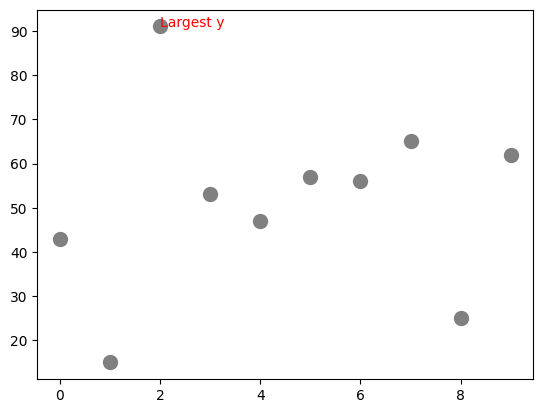

In [65]:
x = np.arange(0,10)
y = np.random.randint(0,100,10)

#marker size set to 100
plt.scatter(x, y, s=100, color='gray')
max_y_index = np.argmax(y)

highest_point_x = x[max_y_index]
highest_point_y = y[max_y_index]

plt.annotate(
    f'Largest y',
    xy=(highest_point_x, highest_point_y),
    # xytext = (highest_point_x + 5, highest_point_y + 5),

    color='red'
)



**Q5. Creating a Custom Colormap**

Generate a heatmap for a 5x5 matrix of random numbers between 0 and 1:
1. Use a custom colormap (blue to red).
2. Add a color bar and display exact cell values rounded to 2 decimals.



<Axes: >

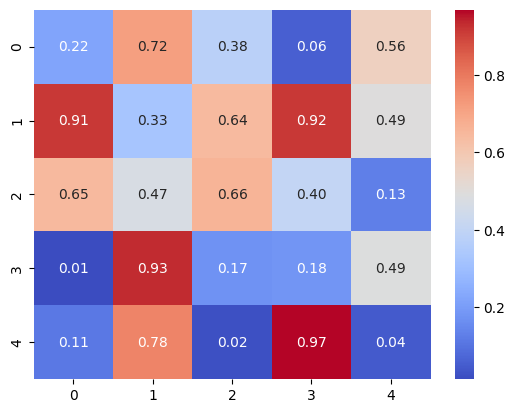

In [72]:
random_matrix = np.random.random((5,5))

# Coolwarm themed heatmap with annotation upto 2 decimal places
sns.heatmap(random_matrix, annot=True, cmap=plt.cm.get_cmap('coolwarm'),fmt='.2f')


**Q6. Customization of 3D Plot**

Using Matplotlib’s mpl_toolkits.mplot3d, create a 3D surface plot for the function:
z = sin(sqrt(x^2 + y^2))

Requirements:
1. Generate x and y values in the range -5 to 5 using a meshgrid.
2. Use a custom colormap that highlights peaks and valleys (e.g., `coolwarm`).
3. Add a color bar with a label "Amplitude".
4. Add labels for all three axes and a title.
5. Rotate the 3D plot to a custom viewing angle using ax.view_init.

In [73]:
import mpl_toolkits.mplot3d as cube

In [77]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
x, y = np.meshgrid(x,y)

In [78]:
z = np.sin(np.sqrt(x ** 2 + y ** 2))

Text(0.5, 0.92, 'sin(sqrt(x^2+y^2))')

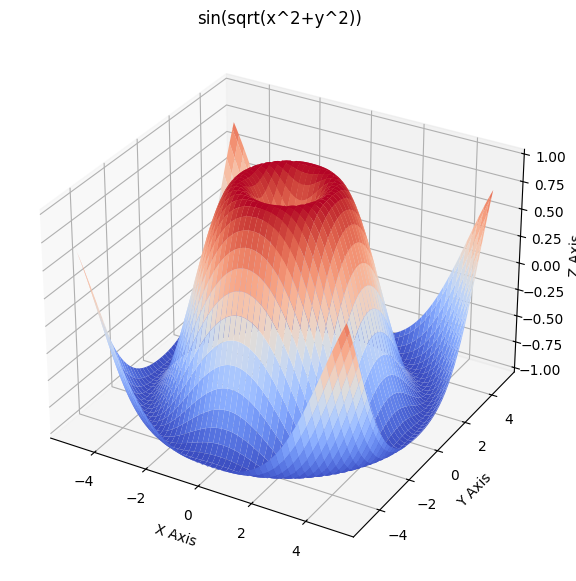

In [80]:
#  Create a figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#  Create the surface plot
surf = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='none')

#  Add labels for all three axes and a title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('sin(sqrt(x^2+y^2))')